<a href="https://colab.research.google.com/github/rladbstj56/2024_PythonDataAnalysis/blob/main/finalterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

08. 클러스터링

cluster [0 2 1 2 2 0 0 2 2 0 1 0 0 0 1 1 2 1 2 1 1 0 1 0 0 0 0 2 0 1 0 2 1 2 2 2 1
 1 2 1 1 0 1 0 1 2 0 2 2 1]
centroid [[0.21409269 0.49978077]
 [0.74683954 0.73709133]
 [0.6856162  0.09953198]]
inertia 3.3586263311041695


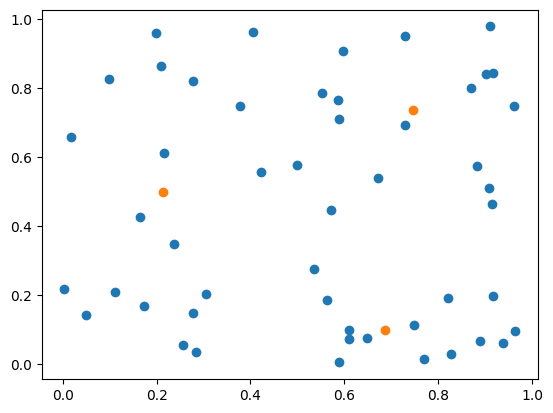

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = np.random.rand(50,2)
plt.scatter(x[:,0],x[:,1])
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print('cluster',kmeans.labels_)
print('centroid',kmeans.cluster_centers_)
print('inertia',kmeans.inertia_)
center = kmeans.cluster_centers_
cx = center[:,0] # cluster X
cy = center[:,1] # cluster Y
plt.scatter(cx,cy)

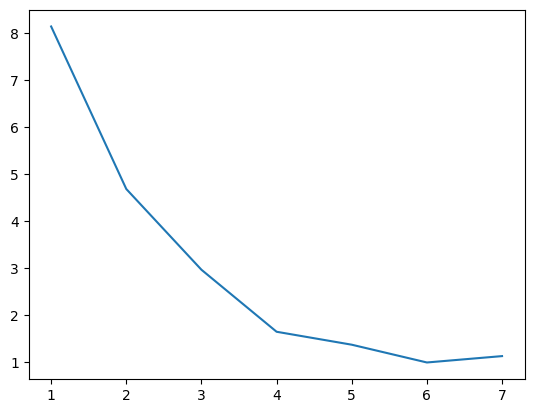

In [3]:
x = np.random.rand(50,2)
inert=[]
for k in range(1,8):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x)
  inert.append(kmeans.inertia_)
plt.plot(range(1,8),inert)

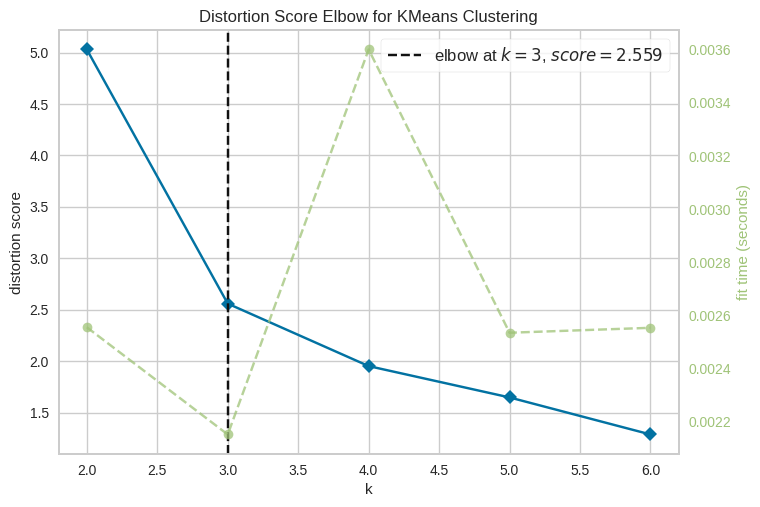

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
from yellowbrick.cluster import KElbowVisualizer
x = np.random.rand(50,2)
vis = KElbowVisualizer(KMeans(), k=(2,7)) # elbow 포인트가 k의 최적값
vis.fit(x)
vis.show()

<ipython-input-6-4a5cde043f3d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=20) # 빈도수 그래프


<Axes: xlabel='Age', ylabel='Density'>

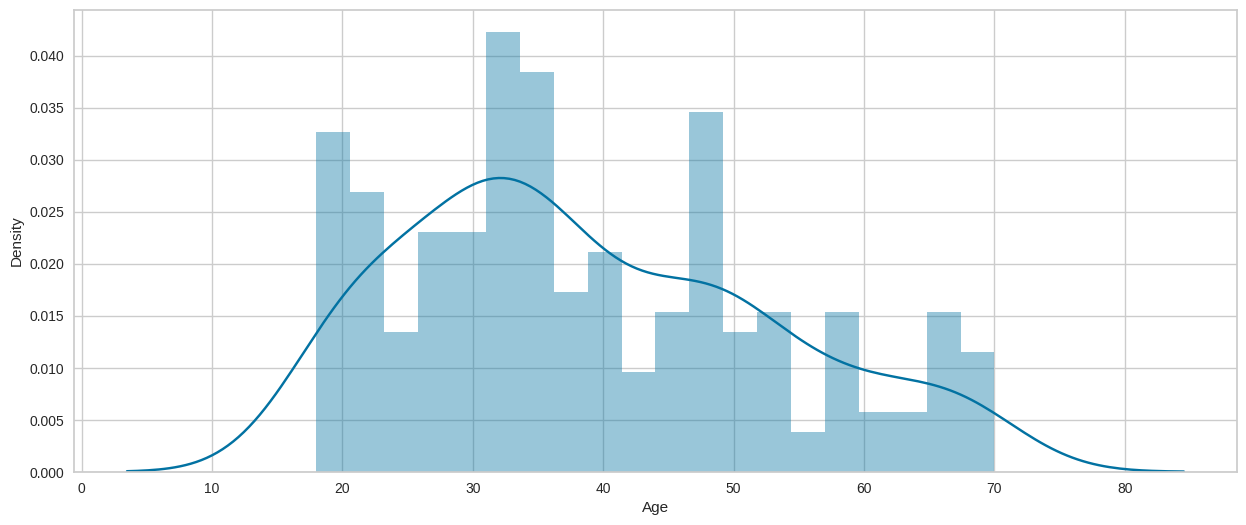

In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/Mall_Customers.csv')
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,6))
sns.distplot(df['Age'],bins=20) # 빈도수 그래프

<ipython-input-7-cfe234d6f7fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'],bins=25)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

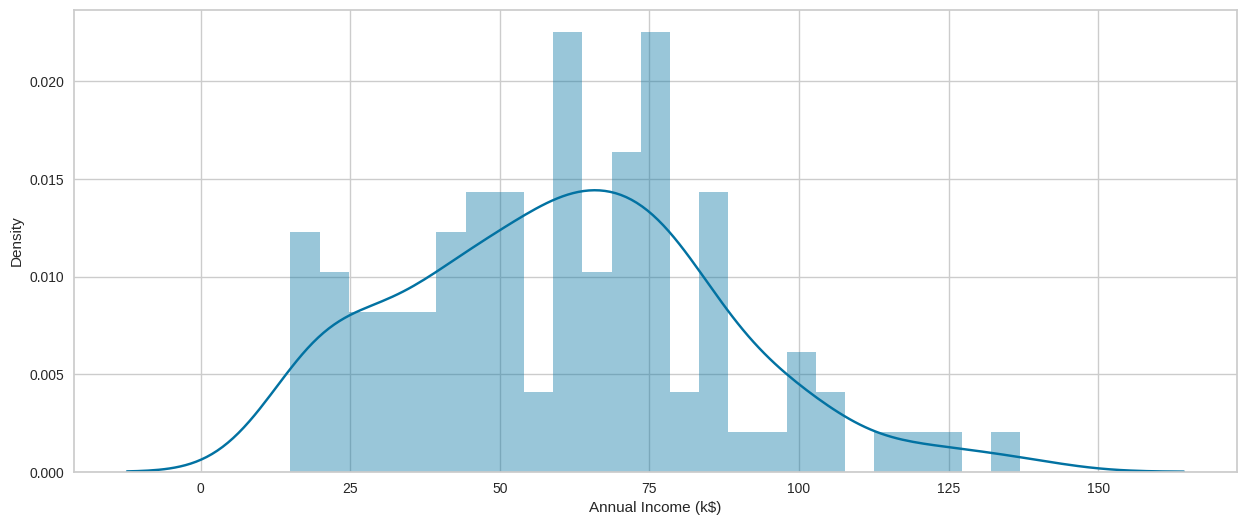

In [7]:
plt.figure(1,figsize=(15,6))
sns.distplot(df['Annual Income (k$)'],bins=25)

<Axes: xlabel='count', ylabel='Gender'>

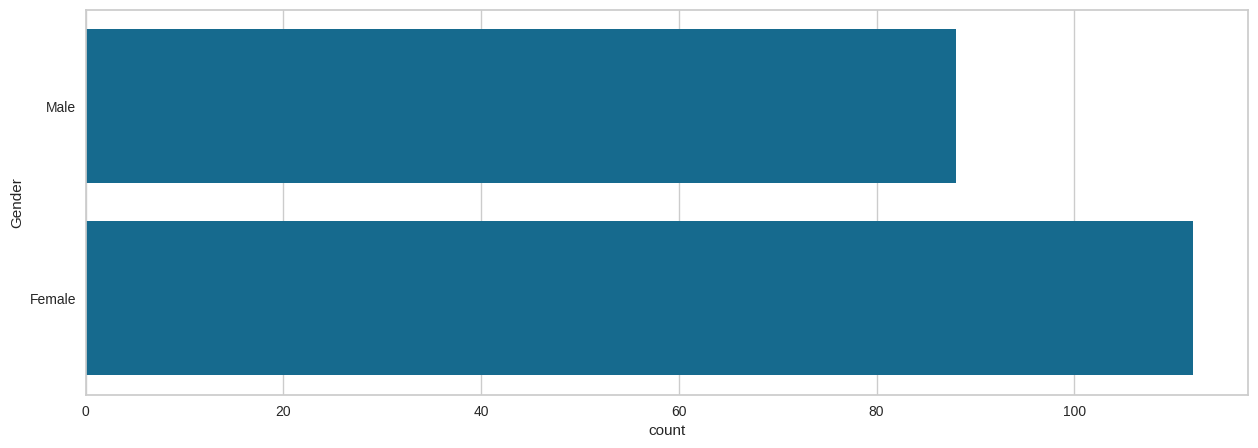

In [8]:
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=df)
# print(df['Gender'].value_counts())

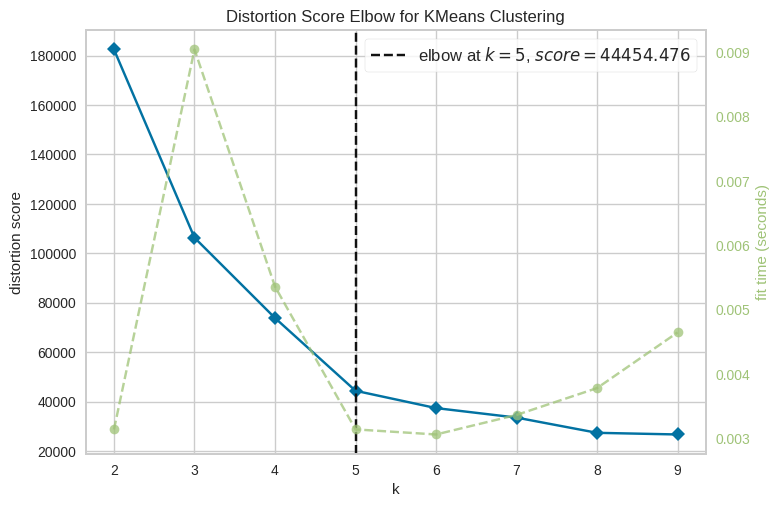

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
data = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model,k=(2,10))
vis.fit(data)
vis.show()

In [10]:
model=KMeans(n_clusters=5)
model.fit(data)
label2=model.labels_
df['label2']=label2 # 새로운 feature 생성
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label2
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

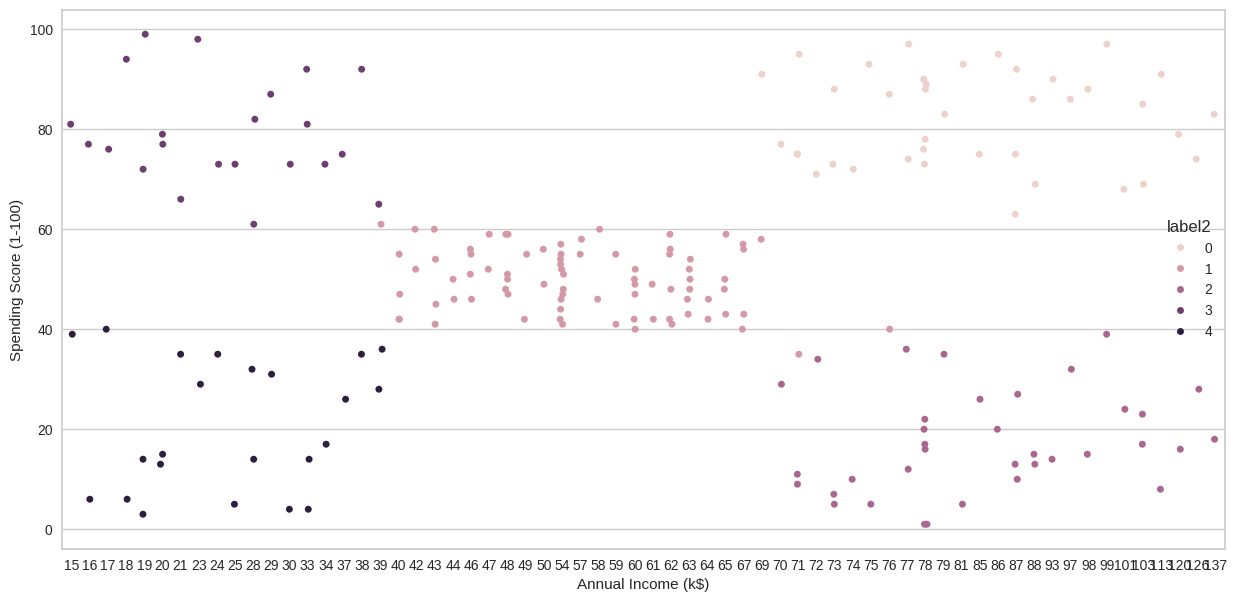

In [11]:
plt.figure(figsize=(15,7))
# 클러스터 시각화
sns.stripplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', data=df, hue='label2',jitter=True)

8장 클러스터링 실습

In [12]:
import pandas as pd
score = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/grade.csv')

score.head()

,id,mid_test,final_test,hw1,hw2,grade
0,30,81,100,97,94,95
1,37,99,95,100,100,95
2,51,97,88,100,100,95
3,54,80,92,100,100,95
4,3,70,82,97,100,90


In [13]:
score['test'] = score['mid_test']*0.4 + score['final_test']*0.6
score['hw'] = score['hw1']*0.5 + score['hw2']*0.5

print(score.head())

   id  mid_test  final_test  hw1  hw2  grade  test     hw
0  30        81         100   97   94     95  92.4   95.5
1  37        99          95  100  100     95  96.6  100.0
2  51        97          88  100  100     95  91.6  100.0
3  54        80          92  100  100     95  87.2  100.0
4   3        70          82   97  100     90  77.2   98.5


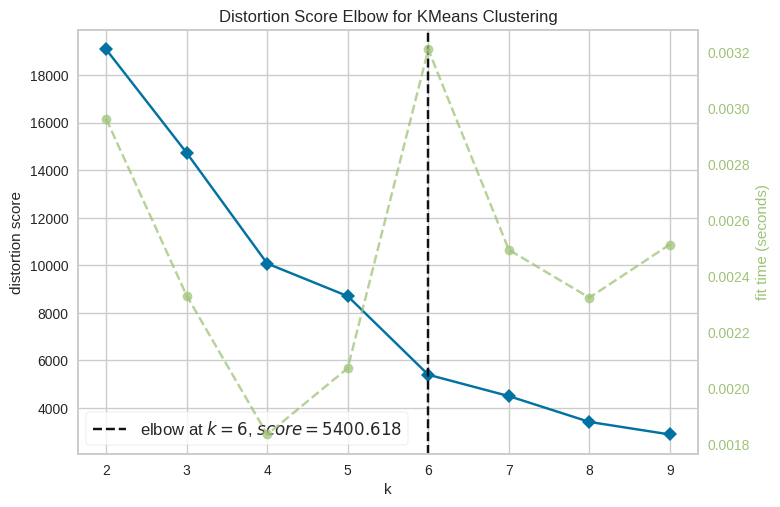

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = score[['test','hw']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model, k=(2,10))
vis.fit(data)
vis.show() # k = 6

In [15]:
model = KMeans(n_clusters = 6)
model.fit(data)
label = model.labels_
score['label'] = label
score.head()
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          57 non-null     int64  
 1   mid_test    57 non-null     int64  
 2   final_test  57 non-null     int64  
 3   hw1         57 non-null     int64  
 4   hw2         57 non-null     int64  
 5   grade       57 non-null     int64  
 6   test        57 non-null     float64
 7   hw          57 non-null     float64
 8   label       57 non-null     int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 3.9 KB


In [16]:
print('cluster',model.labels_)

cluster [2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 5 5 1 1 1
 5 1 1 5 1 5 4 4 5 1 1 1 1 4 4 1 1 4 4 4]


centroid [[75.3        66.375     ]
 [39.1        64.625     ]
 [85.27272727 98.22727273]
 [61.62352941 93.11764706]
 [39.25714286 26.92857143]
 [53.53333333 45.5       ]]
inertia 4868.033692386044
score -4868.033692386044


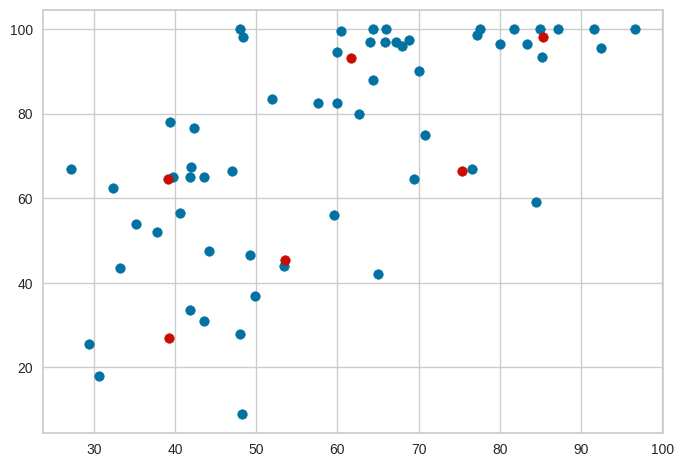

In [17]:
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
x = score[['test']]
y = score[['hw']]
plt.scatter(x,y)
plt.scatter(cx,cy,c='r')
plt.show()

In [20]:
# 조건 2
import numpy as np
score['test'] = score['mid_test']*0.3+score['final_test']*0.4+score['hw1']*0.15+score['hw2']*0.15
present = np.random.randint(101,size=(57,1))
print(present[:10])

[[80]
 [76]
 [12]
 [33]
 [77]
 [42]
 [12]
 [41]
 [87]
 [72]]


In [22]:
score['present'] = present
score.head()

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present
0,30,81,100,97,94,95,92.95,95.5,2,80
1,37,99,95,100,100,95,97.70,100.0,2,76
2,51,97,88,100,100,95,94.30,100.0,2,12
3,54,80,92,100,100,95,90.80,100.0,2,33
4,3,70,82,97,100,90,83.35,98.5,2,77


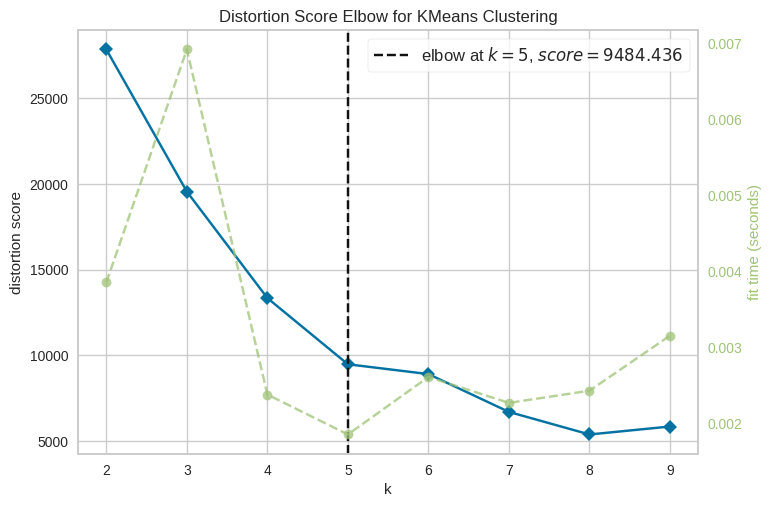

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
data = score[['test','present']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model, k=(2,10))
vis.fit(data)
vis.show() # k = 5

In [24]:
model = KMeans(n_clusters = 5)
model.fit(data)
label2 = model.labels_
score['label2'] = label2
score.head(10)

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2
0,30,81,100,97,94,95,92.95,95.5,2,80,3
1,37,99,95,100,100,95,97.70,100.0,2,76,3
2,51,97,88,100,100,95,94.30,100.0,2,12,2
3,54,80,92,100,100,95,90.80,100.0,2,33,2
4,3,70,82,97,100,90,83.35,98.5,2,77,3
5,4,87,81,100,93,90,87.45,96.5,2,42,4
6,7,89,74,93,100,90,85.25,96.5,2,12,2
7,8,86,72,100,100,90,84.60,100.0,2,41,4
8,12,89,77,100,100,90,87.50,100.0,2,87,3
9,45,79,89,100,100,90,89.30,100.0,2,72,3


centroid [[43.21071429 68.5       ]
 [44.19375    17.        ]
 [79.74583333 17.        ]
 [80.815      78.3       ]
 [68.10769231 41.        ]]
inertia 9342.97485279304
score -9342.97485279304


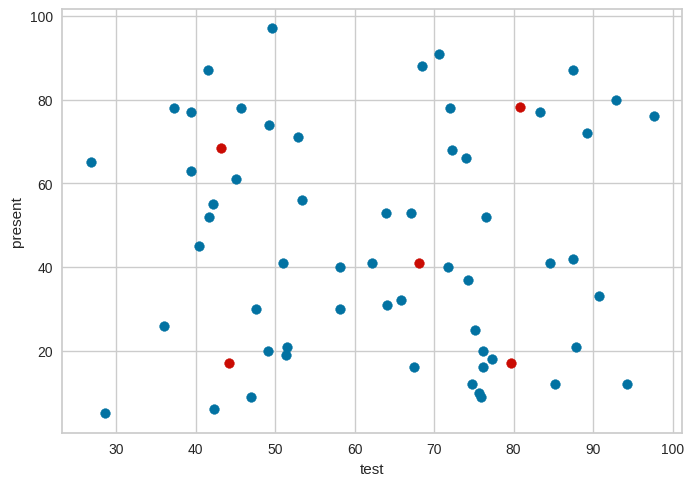

In [25]:
x = score[['test']]
y = score[['present']]
plt.scatter(x,y)
plt.xlabel('test')
plt.ylabel('present')
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
plt.scatter(cx,cy,c='r')
plt.show()

In [27]:
# 조건3
score['total'] = score['mid_test']*0.3 + score['final_test']*0.4 + score['hw1']*0.15 + score['hw2']*0.15
score['0'] = 0
score.head()

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2,total,0
0,30,81,100,97,94,95,92.95,95.5,2,80,3,92.95,0
1,37,99,95,100,100,95,97.70,100.0,2,76,3,97.70,0
2,51,97,88,100,100,95,94.30,100.0,2,12,2,94.30,0
3,54,80,92,100,100,95,90.80,100.0,2,33,2,90.80,0
4,3,70,82,97,100,90,83.35,98.5,2,77,3,83.35,0


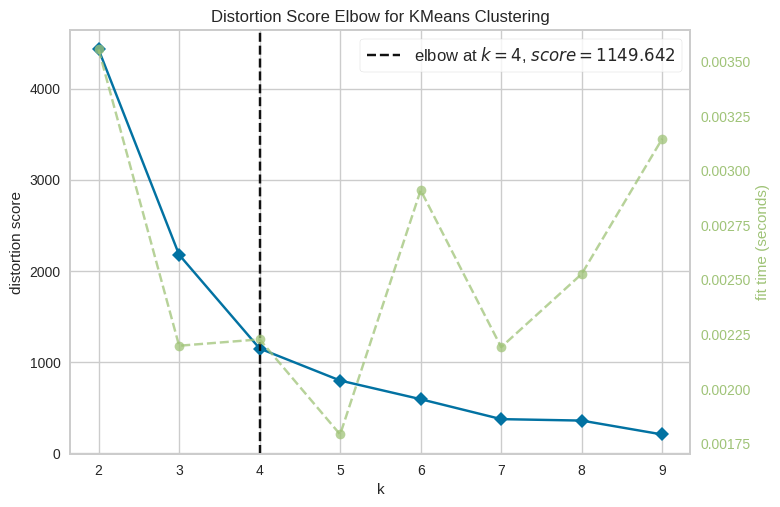

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
data = score[['total','0']].iloc[:,:].values
model = KMeans()
vis = KElbowVisualizer(model,k=(2,10))
vis.fit(data)
vis.show() # k = 4

In [29]:
model = KMeans(n_clusters = 4)
model.fit(data)
label3 = model.labels_
score['label3'] = label3
score.head(10)

,id,mid_test,final_test,hw1,hw2,grade,test,hw,label,present,label2,total,0,label3
0,30,81,100,97,94,95,92.95,95.5,2,80,3,92.95,0,3
1,37,99,95,100,100,95,97.70,100.0,2,76,3,97.70,0,3
2,51,97,88,100,100,95,94.30,100.0,2,12,2,94.30,0,3
3,54,80,92,100,100,95,90.80,100.0,2,33,2,90.80,0,3
4,3,70,82,97,100,90,83.35,98.5,2,77,3,83.35,0,3
5,4,87,81,100,93,90,87.45,96.5,2,42,4,87.45,0,3
6,7,89,74,93,100,90,85.25,96.5,2,12,2,85.25,0,3
7,8,86,72,100,100,90,84.60,100.0,2,41,4,84.60,0,3
8,12,89,77,100,100,90,87.50,100.0,2,87,3,87.50,0,3
9,45,79,89,100,100,90,89.30,100.0,2,72,3,89.30,0,3


centroid [[50.72142857  0.        ]
 [71.52619048  0.        ]
 [37.8         0.        ]
 [89.18636364  0.        ]]
inertia 1149.6421212121218
score -1149.6421212121218


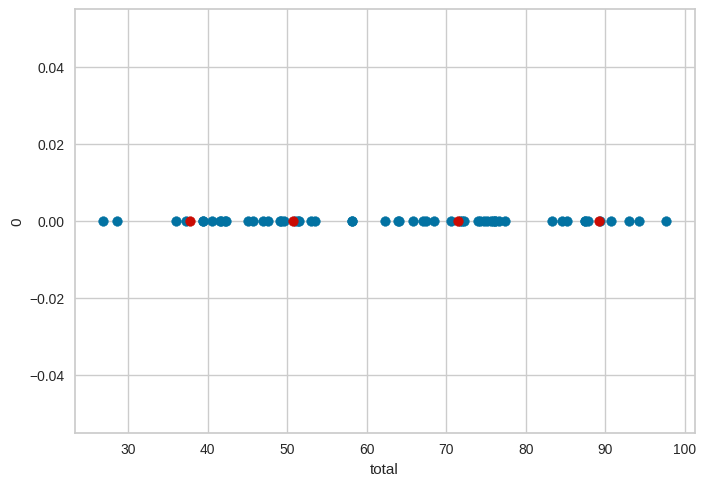

In [30]:
x = score[['total']]
y = score[['0']]
plt.scatter(x,y)
plt.xlabel('total')
plt.ylabel('0')
print('centroid',model.cluster_centers_)
print('inertia',model.inertia_)
print('score',model.score(data))
center = model.cluster_centers_
cx = center[:,0]
cy = center[:,1]
plt.scatter(cx,cy,c='r')
plt.show()

9장 분류알고리즘

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dia = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dia_x=dia.iloc[:,:8]
dia_y=dia.iloc[:,8]
print(dia_x.head())
print(dia_y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [33]:
x_train,x_test,y_train,y_test=train_test_split(dia_x,dia_y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [36]:
scaler = StandardScaler() # 평균에서 떨어진 정도
x_train_std=scaler.fit_transform(x_train)
print(x_train_std[:3],"end\n")
x_test_std=scaler.fit_transform(x_test)
print(x_test_std[:3])

[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]] end

[[ 0.49124165 -0.72667791 -0.44147615  0.66730833  1.0519189   0.23374785
  -0.17094071  0.66661154]
 [-0.63368347 -0.28534901  0.31890843  0.61130534 -0.66022144  0.43537945
  -1.08608042 -1.07335756]
 [-0.63368347 -0.41144298 -0.17310512 -1.18079028 -0.66022144 -0.14579397
  -1.05362866 -1.07335756]]


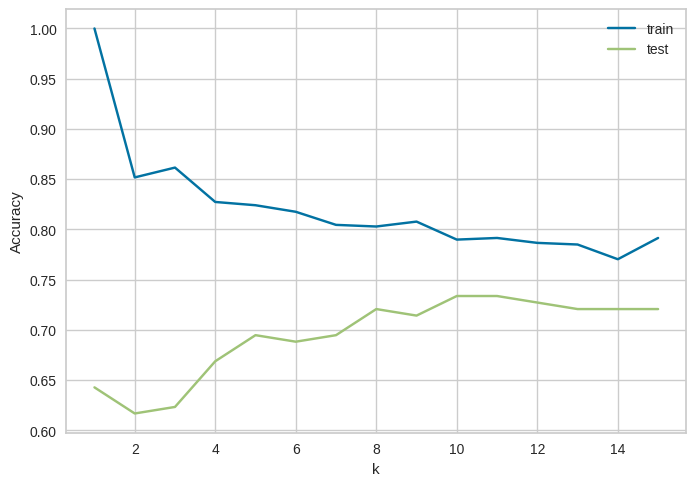

In [37]:
train_accuracy=[]
test_accuracy=[]

neighbors=range(1,16)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_std,y_train)
  score = knn.score(x_train_std, y_train)
  train_accuracy.append(score)
  score = knn.score(x_test_std, y_test)
  test_accuracy.append(score)
plt.plot(neighbors, train_accuracy, label='train')
plt.plot(neighbors, test_accuracy, label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
k=10 # 최근접 이웃의 수
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_std,y_train)
y_pred = knn.predict(x_test_std)
print(y_pred) # 당뇨병 여부 (1=yes, 0=no)

[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [40]:
cf = confusion_matrix(y_test,y_pred)
# TP FN
# FP TN
print(cf)
print(knn.score(x_test_std,y_test))

[[85 14]
 [27 28]]
0.7337662337662337


In [41]:
score = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/grade2.csv')
print(score.head())

   no  mid_test  final_test  hw1  hw2  grade mark
0   1        75          68   76   74     85   B+
1   2        76          56   95   99     85   B+
2   3        70          82   97  100     90    A
3   4        87          81  100   93     90    A
4   5        79          88   82   36     85   B+


In [42]:
score['test'] = score['mid_test']*0.4 + score['final_test']*0.4
score['test'] = score['test'].astype(int)
score['hw'] = score['hw1']*0.1 + score['hw2']*0.1
score['hw'] = score['hw'].astype(int)
print(score.head())

   no  mid_test  final_test  hw1  hw2  grade mark  test  hw
0   1        75          68   76   74     85   B+    57  15
1   2        76          56   95   99     85   B+    52  19
2   3        70          82   97  100     90    A    60  19
3   4        87          81  100   93     90    A    67  19
4   5        79          88   82   36     85   B+    66  11


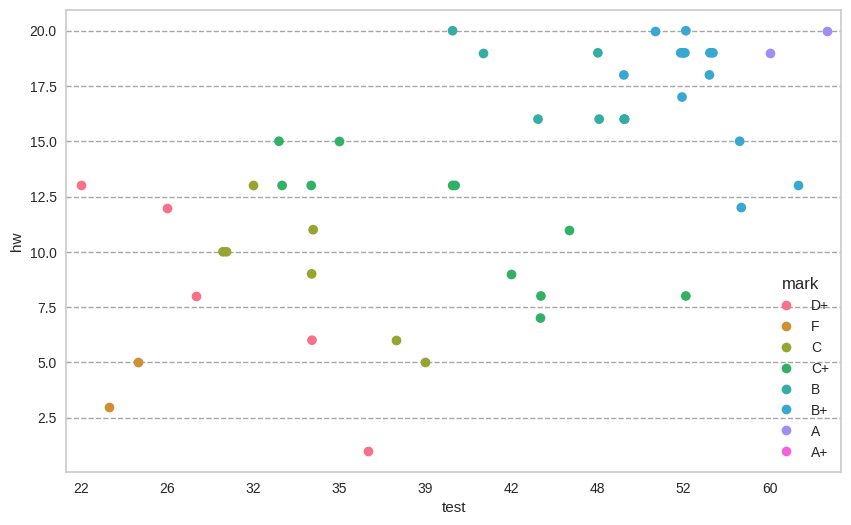

In [43]:
x = score['test']
y = score['hw']
mark = score['mark']
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 80, 3))
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
sns.stripplot(x='test',y='hw',data=score,hue='mark',size=7)
plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier
data = list(zip(x,y)) # 튜플 리스트
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data,mark)
knn.score(data,mark)

0.8771929824561403

In [45]:
item = [(40,7.5),(44,14),(67,18.5)]

for i in (1,2,3,5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(data,mark)
  pred = knn.predict(item)
  print(pred)
  print(knn.score(data,mark))

['C+' 'B' 'A']
1.0
['C' 'B' 'A']
0.8947368421052632
['C' 'C+' 'A']
0.8771929824561403
['C+' 'C+' 'A']
0.8421052631578947


In [47]:
df = score[['test','hw']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 0~1사이로 정규화
df_std = scaler.fit_transform(df)
df_std = (df_std*100).astype(int)
df2 = pd.DataFrame(df_std,columns=['test','hw'])
print(df2[:10])

   test   hw
0    63   73
1    54   94
2    69   94
3    81   94
4    80   52
5    20   73
6    78   94
7    74  100
8    21   63
9    30   21


9장 중 나이브베이즈

In [48]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
game = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/play_tennis.csv')
print(game.head())
print(game.info())

  day   outlook  temp humidity    wind play
0  D1     Sunny   Hot     High    Weak   No
1  D2     Sunny   Hot     High  Strong   No
2  D3  Overcast   Hot     High    Weak  Yes
3  D4      Rain  Mild     High    Weak  Yes
4  D5      Rain  Cool   Normal    Weak  Yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes
None


In [49]:
lb = LabelEncoder()
game['day'] = lb.fit_transform(game['day'])
game['outlook'] = lb.fit_transform(game['outlook'])
game['temp'] = lb.fit_transform(game['temp'])
game['humidity'] = lb.fit_transform(game['humidity'])
game['wind'] = lb.fit_transform(game['wind'])
game['play'] = lb.fit_transform(game['play'])
print(game.head())

   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


In [50]:
x = game[['outlook','temp']]
y = game[['play']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('score',accuracy_score(y_test,y_pred))
data = pd.DataFrame([1])
print(model.predict([[0,2]]))

score 0.6
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


9장 나이브베이즈 실습

In [52]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
game = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/play_tennis.csv')

lb = LabelEncoder()
game['day'] = lb.fit_transform(game['day'])
game['outlook'] = lb.fit_transform(game['outlook'])
game['temp'] = lb.fit_transform(game['temp'])
game['humidity'] = lb.fit_transform(game['humidity'])
game['wind'] = lb.fit_transform(game['wind'])
game['play'] = lb.fit_transform(game['play'])
print(game.head())

   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


In [53]:
x = game[['outlook','wind']]
y = game[['play']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('score',accuracy_score(y_test,y_pred))
print(model.predict([[1,1]])) # rain, weak
cf = confusion_matrix(y_test,y_pred)
print(cf)

score 0.6
[1]
[[0 2]
 [0 3]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [54]:
x = game[['wind','humidity']]
y = game[['play']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('score',accuracy_score(y_test,y_pred))
print(model.predict([[0,1]])) # strong, normal
cf = confusion_matrix(y_test,y_pred)
print(cf)

score 0.6
[1]
[[1 1]
 [1 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


10장은 241112부터 !